Este documento analiza el costo de oportunidad de una inversión argentina. Para saber cual será el retorno que tiene que solicitar un inversor al momento de decidir si le conviene o no invertir tanto en un activo financiero o un proyecto.
La primera medida a tener en cuenta es el costo de oportunidad en el tiempo, en nuestro caso la inflación en la moneda, los pesos argentinos, como la moneda va perdiendo valor adquisitivo en el transcurso del tiempo. Siendo nuestro principal objetivo, tener una inversión que le gane a la inflación 
El dato lo tenemos reflejado como la evolución del tipo de cambio (dolar/peso) a lo largo del tiempo.

Debemos tener en cuenta la evolución del dolar oficial y paralelo, este último lo obtenemos por el dolar que están operando los agentes del mercado (Dolar MEP). Podemos obtener la evolución del tipo de cambio de mercado dividiendo las ADRs argentinas por sus acciones locales del Merval, ya que al ser el mismo activo deberían valer lo mismo y en su conversión obtenemos el Tipo de Cambio al que están operando. 

In [1]:
import yfinance as yahoo
import pandas as pd
import numpy as np
import scipy.optimize as sco
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
instrumentos = ['ARS=X', 'BMA', 'BMA.BA', 'CEPU', 'CEPU.BA', 'CRES.BA', 'CRESY', 'EDN',
       'EDN.BA', 'GGAL', 'GGAL.BA', 'IRS', 'IRSA.BA', 'LOMA', 'LOMA.BA', 'PAM',
       'PAMP.BA', 'SUPV', 'SUPV.BA', 'TECO2.BA', 'TEO', 'TGS', 'TGSU2.BA',
       'YPF', 'YPFD.BA']

data = yahoo.download(tickers=instrumentos, period="3y")['Adj Close']

ba = [i.replace('.BA','BA') for i in instrumentos]

data.columns = ba

data = data.fillna(method='ffill')

cable = pd.DataFrame(data=None)

cable['BMA'] = (data.BMABA / data.BMA) * 10
cable['CEPU'] = (data.CEPUBA / data.CEPU) * 10
cable['CRES'] = (data.CRESBA / data.CRESY) * 10
cable['EDN'] = (data.EDNBA / data.EDN) * 20
cable['GGAL'] = (data.GGALBA / data.GGAL) * 10
cable['IRSA'] = (data.IRSABA / data.IRS) * 10
cable['LOMA'] = (data.LOMABA / data.LOMA) * 5
cable['PAMP'] = (data.PAMPBA / data.PAM) * 25
cable['SUPV'] = (data.SUPVBA / data.SUPV) * 5
cable['TECO2'] = (data.TECO2BA / data.TEO) * 5
cable['TGSU2'] = (data.TGSU2BA / data.TGS) * 5
cable['YPF'] = (data.YPFDBA / data.YPF)
cab = pd.DataFrame(index=data.index)
cab['promediocable'] = cable.T.median()
cab['dolaroficial'] = data.iloc[:,0]



[*********************100%***********************]  25 of 25 completed


c:\users\pc\python\python37\lib\site-packages\numpy\lib\nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


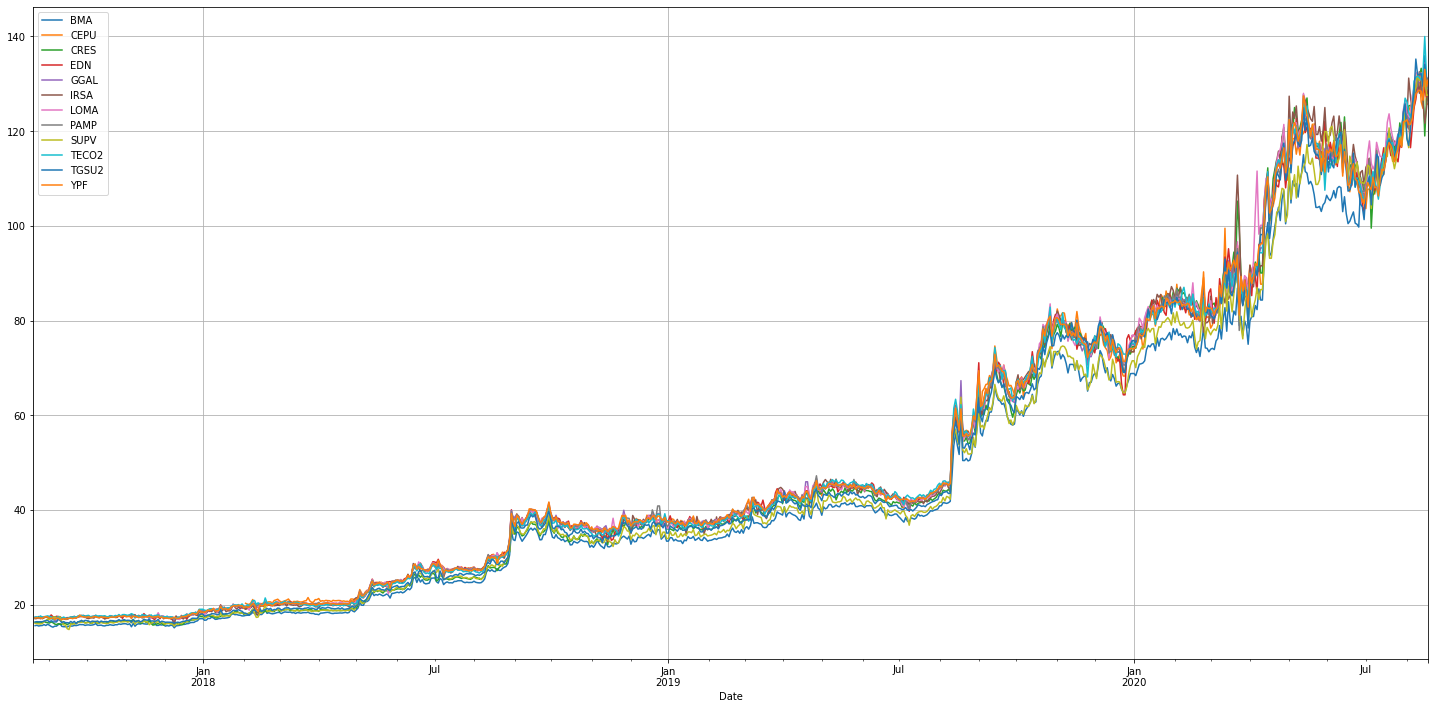

In [3]:
ca = cable.plot(figsize=(25,12))
ca.grid()

Graficamos la evolución del Dolar de Mercado Promedio vs. el Dolar Oficial

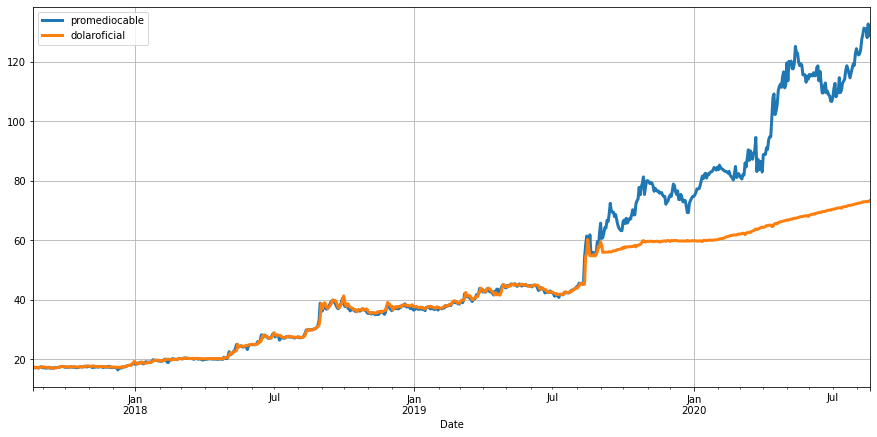

In [11]:
cabb = cab.plot(figsize=(15,7), lw=3.)
cabb.grid()

Graficamos la devaluación del peso argentino versus el dolar de mercado, como medida de descuento para tener como tasa a exigir a nuestras inversiones para ganarle a la inflación

Date
2017-08-21         NaN
2017-08-22         NaN
2017-08-23   -0.000006
2017-08-24    0.000218
2017-08-25   -0.000979
                ...   
2020-08-13    2.228457
2020-08-14    2.205684
2020-08-17    2.241458
2020-08-18    2.211460
2020-08-19    2.219329
Freq: B, Name: promediocable, Length: 783, dtype: float64

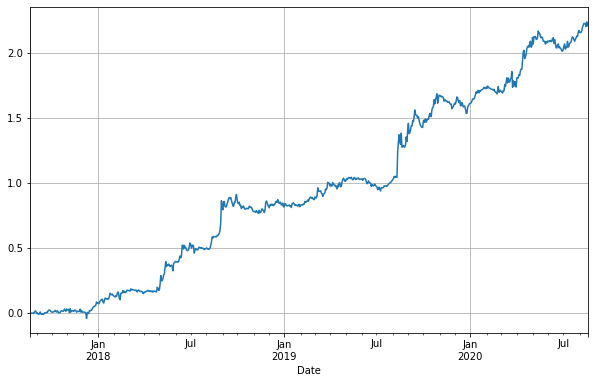

In [8]:
adrmedio = cab.promediocable.pct_change().cumsum().plot(figsize=(10,6))
adrmedio.grid()
cab.promediocable.pct_change().cumsum()

Desde Agosto 2017 a hoy, el peso ha perdido el 220% de su valor. Lo que nos dice 
que mensualmente debemos solicitar que rinda casi 6% mes a mes (220%/36meses) de forma segura
para invertir bajo la mínima pretensión de mantener el valor de nuestro dinero
en el transcurso del tiempo

c:\users\pc\python\python37\lib\site-packages\numpy\lib\nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


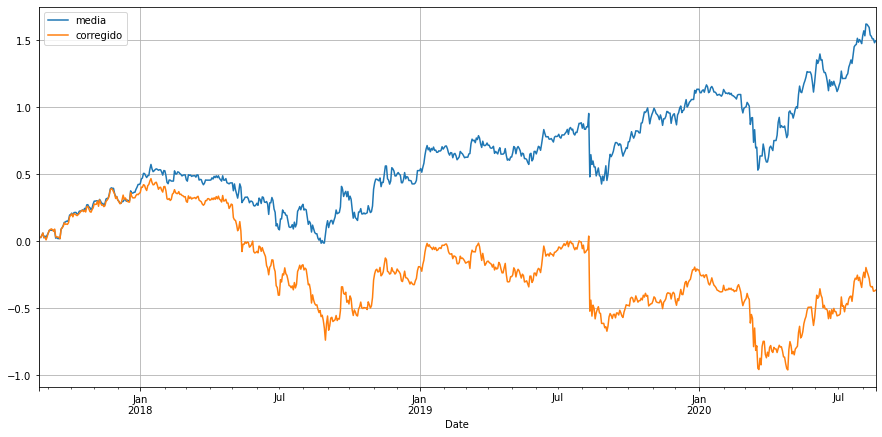

In [9]:
# ¿El Merval protegio el valor de nuestro dinero durante ese período? Veamos.

merval = pd.DataFrame(None) 
merval['BMABA'] = data.BMABA
merval['CEPUBA'] = data.CEPUBA
merval['CRESBA'] = data.CRESBA
merval['EDNBA'] = data.EDNBA
merval['GGALBA'] = data.GGALBA
merval['IRSABA'] = data.IRSABA
merval['LOMABA'] = data.LOMABA
merval['SUPVBA'] = data.SUPVBA
merval['TECO2BA'] = data.TECO2BA
merval['TGSU2BA'] = data.TGSU2BA
merval['YPFDBA'] = data.YPFDBA

mervalpromedio = pd.DataFrame(index=merval.index)
mervalpromedio['media'] = merval.T.median()
mervalpromedio['corregido'] = mervalpromedio.media / cab.promediocable

merv = mervalpromedio.pct_change().cumsum().plot(figsize=(15,7))
merv.grid()

Observamos la tasa de rendimiento en pesos de argentina (linea azul) y la corregimos por el dolar mercado (linea naranja)

Podemos observar que el Merval (1) no es una opción de estabilidad para nuestros ahorros, expuesto a los vaivenes políticos del riesgo argentino y (2) no obtuvimos activo argentino en el cual nos pudimos amparar de la inflación. 
Entonces analizamos el mismo rendimiento de CEDEARS como alternativa (CErtificado de DEpósito ARgentino)por el cuál empresas como Apple, Microsoft, Intel, Walmart, Barrick Gold, Coca Cola, Tesla y otras empresas internacionales acceden al mercado argentino a un título convertido en pesos dolarizados (atados al tipo de cambio del mercado)

[*********************100%***********************]  2 of 2 completed


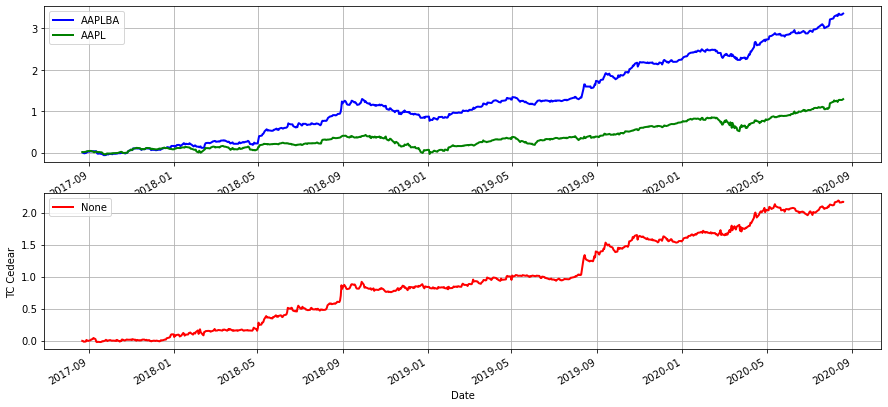

In [10]:
# Observamos el caso de Apple, ver que factores atribuyen la rentabilidad de su cedear

cedear = yahoo.download("AAPL AAPL.BA", period="3y")['Adj Close'].fillna(method='ffill')
cedear = cedear.rename(columns={'AAPL.BA':'AAPLBA'})

tc_apple = (cedear.AAPLBA / cedear.AAPL) * 10 

fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(211)
cedear.AAPLBA.pct_change().cumsum().plot(ax=ax1, color='b', lw=2., legend=True)
cedear.AAPL.pct_change().cumsum().plot(ax=ax1, color='g', lw=2., legend=True)
ax1.grid()
ax2 = fig.add_subplot(212, ylabel='TC Cedear')
tc_apple.pct_change().cumsum().plot(ax=ax2, color='r', lw=2., legend=True)
ax2.grid()
plt.show()



Lección: observamos que el cedear de Apple (APPL.BA) rinde un 220% por encime del activo que hace de referencia de Estados Unidos. Esto se debe a que el activo esta amparado de la devaluación cambiaria como de la inflación argentina. Siendo las CEDEARS nuestra opción de libre de riesgo más disponible en nuestro mercado.
Por este medio podemos dolarizar los fondos de ahorro y, a la vez, poder tener una cartera de inversión que refleje los rendimientos de activos extranjeros

OBSERVEMOS la evolución de precio del cedear de Apple y su precio de conversión (resultado de dividir la acción de afuera por el cedear local)

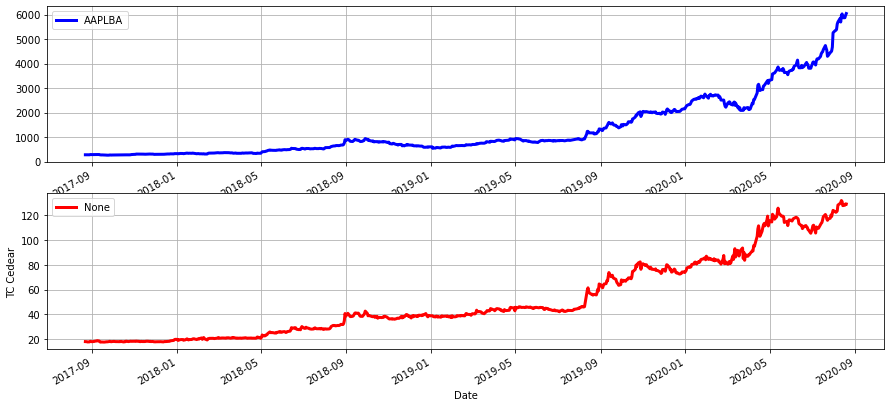

In [13]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(211)
cedear.AAPLBA.plot(ax=ax1, color='b', lw=3., legend=True)
ax1.grid()
ax2 = fig.add_subplot(212, ylabel='TC Cedear')
tc_apple.plot(ax=ax2, color='r', lw=3., legend=True)
ax2.grid()
plt.show()


In [16]:
cedear.AAPLBA, tc_apple

(Date
 2017-08-21            NaN
 2017-08-22     277.706970
 2017-08-23     277.706970
 2017-08-24     275.709045
 2017-08-25     273.711182
                  ...     
 2020-08-13    6025.000000
 2020-08-14    5870.000000
 2020-08-17    5870.000000
 2020-08-18    5970.000000
 2020-08-19    6039.500000
 Name: AAPLBA, Length: 774, dtype: float64,
 Date
 2017-08-21           NaN
 2017-08-22     18.094938
 2017-08-23     18.072318
 2017-08-24     18.022284
 2017-08-25     17.825652
                  ...    
 2020-08-13    130.966870
 2020-08-14    127.711419
 2020-08-17    128.045723
 2020-08-18    129.150892
 2020-08-19    129.005040
 Length: 774, dtype: float64)

Podemos ver que Agosto 2017 por 1 cedear de Apple(277) a un dolar a (18).

Agosto 2020 el cedear de Apple se valoro en (6039) con un dolar a (130).